In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
dfcases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

# A1. Write your own functions for the following modules:
a) Summation unit

b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions


c) Comparator unit for Error calculation

In [4]:
def summation(inputs, weights,bias):
    return sum(x * w for x, w in zip(inputs, weights)) + bias

def step(x):
    return 1 if x > 0 else 0

def bipolar_step(x):
    return 1 if x > 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return max(alpha * x, x)

def error_comparator(predictions, targets):
    return sum((p - t) ** 2 for p, t in zip(predictions, targets))

def activation_function(x, function="relu", threshold=0, alpha=0.01):
    if function == "step":
        return step(x)
    elif function == "bipolar_step":
        return bipolar_step(x)
    elif function == "sigmoid":
        return sigmoid(x)
    elif function == "tanh":
        return tanh(x)
    elif function == "relu":
        return relu(x)
    elif function == "leaky_relu":
        return leaky_relu(x, alpha=alpha)
    else:
        raise ValueError(f"Unknown activation function: {function}")

A2. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05

In [5]:
def train(training_data, weights, bias, act_function=None, learning_rate=0.05, max_epochs=1000, conv_error=0.002, ret_weights=True):
    error_history = []
    for epoch in range(max_epochs):
        total_error = 0
        for inputs, target in training_data:
            inputs = np.array(inputs)
            summation_result = summation(inputs, weights, bias)
            pred = activation_function(summation_result, function=act_function)

            error = target - pred
            total_error += error ** 2

            # Update weights and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * inputs[i]
            bias += learning_rate * error

        error_history.append(total_error)

        # Check for convergence
        if total_error <= conv_error:
            break

    if ret_weights:
        return weights, bias, error_history
    else:
        return error_history

training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

weights = [0.2,-0.75]

weights, bias,errors = train(training_data,weights,10,act_function="step")



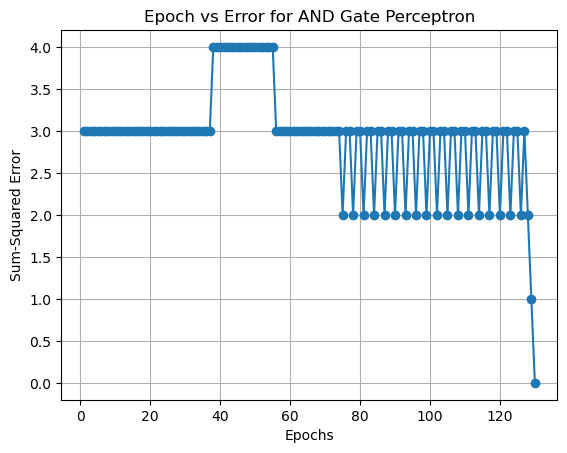

In [6]:

import matplotlib.pyplot as plt

# Extract the list of errors from the tuple
errors_list = errors

# Plot the error history
plt.plot(range(1, len(errors_list) + 1), errors_list, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for AND Gate Perceptron")
plt.grid(True)
plt.show()

A3. Repeat the above A1 experiment with following activation functions (write your own code for activation functions). Compare the iterations taken to converge against each of the activation functions. Keep the learning rate same as A1.

• Bi-Polar Step function

• Sigmoid function

• ReLU function

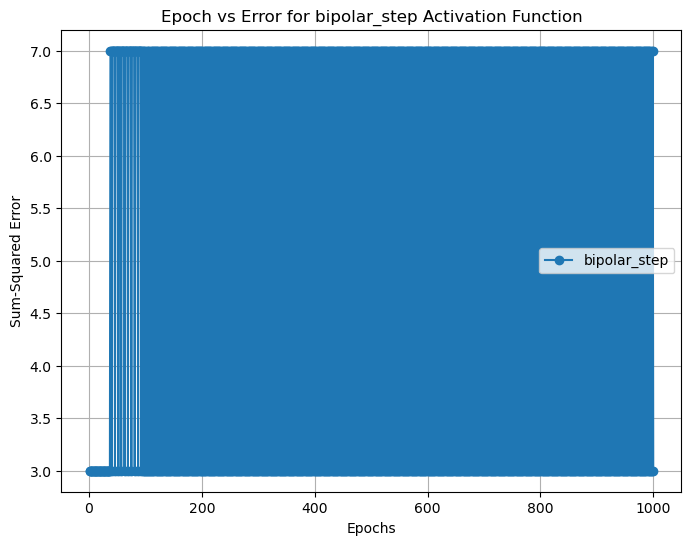

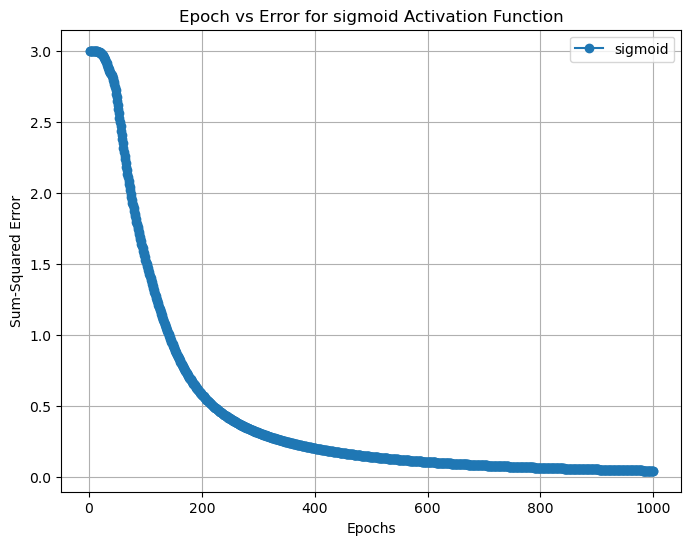

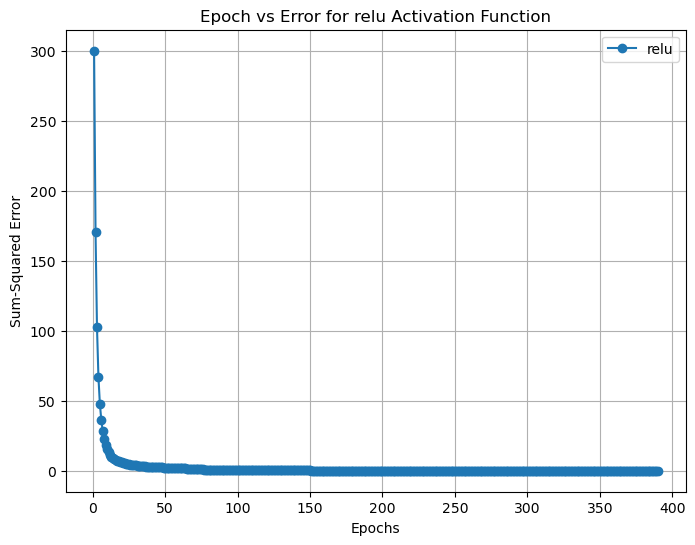

In [7]:
activation_functions = ["bipolar_step", "sigmoid", "relu"]

# Train perceptron and plot results for each activation function
for act_func in activation_functions:
    weights = [0.2, -0.75]
    b = 10
    weights, b, errors = train(training_data, weights, b, act_function=act_func, learning_rate=0.05)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=act_func)
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title(f"Epoch vs Error for {act_func} Activation Function")
    plt.legend()
    plt.grid(True)
    plt.show()

A4. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.


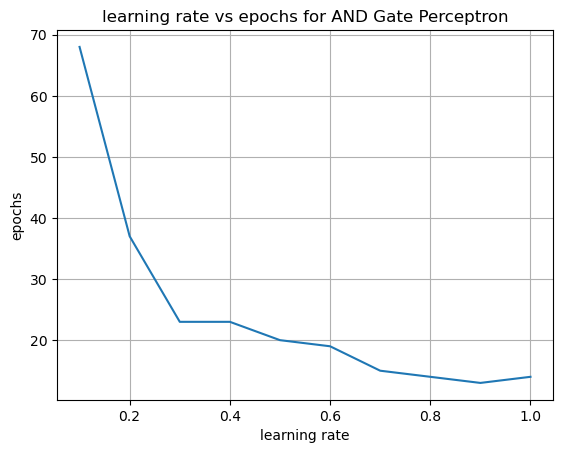

In [8]:
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs=[]
for i in learning_rate:
    weights = [0.2, -0.75]
    b = 10
    weights, b, errors = train(training_data, weights, b, act_function="step", learning_rate=i)
    epochs.append(len(errors))

plt.plot(learning_rate,epochs)
plt.xlabel("learning rate")
plt.ylabel("epochs")
plt.title("learning rate vs epochs for AND Gate Perceptron")
plt.grid(True)
plt.show()


A5.  Repeat the above exercises, A1 to A3, for XOR gate logic.

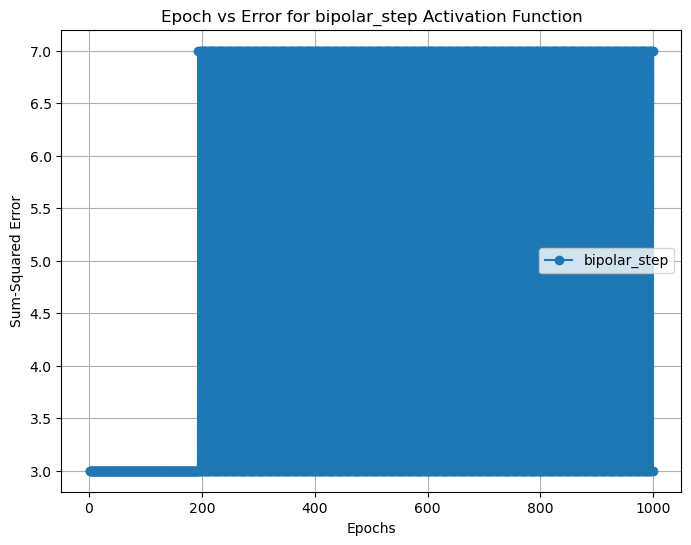

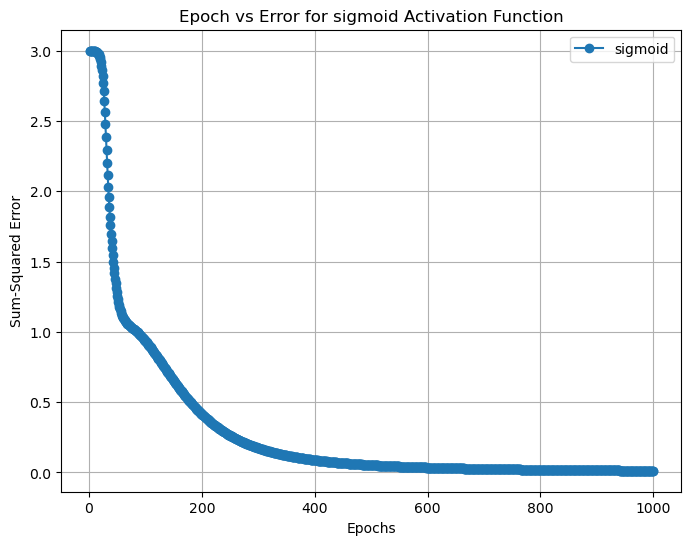

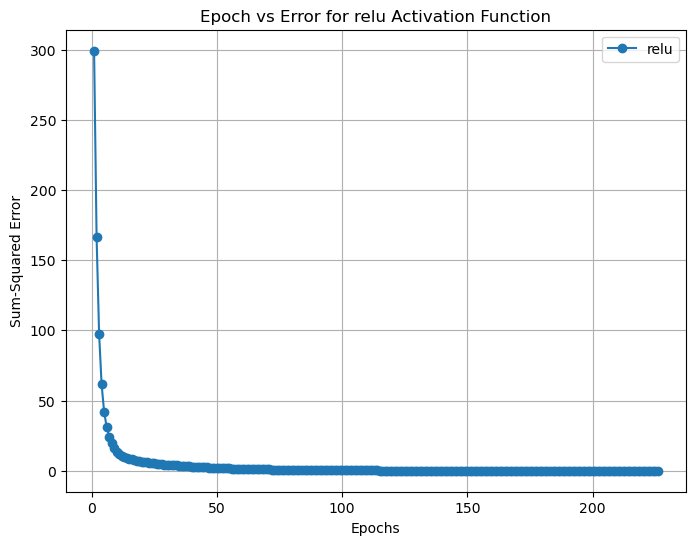

In [9]:
training_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 0),
    ([1, 1], 0)
]

activation_functions = ["bipolar_step", "sigmoid", "relu"]

# Train perceptron and plot results for each activation function
for act_func in activation_functions:
    weights = [0.2, -0.75]
    b = 10
    weights, b, errors = train(training_data, weights, b, act_function=act_func, learning_rate=0.05)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=act_func)
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title(f"Epoch vs Error for {act_func} Activation Function")
    plt.legend()
    plt.grid(True)
    plt.show()

A6. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice

In [10]:
training_data = [
    ([20, 6, 2, 386], 1),
    ([16, 3, 6, 289], 1),
    ([27, 6, 2, 393], 1),
    ([19, 1, 2, 110], 0),
    ([24, 4, 2, 280], 1),
    ([22, 1, 5, 167], 0),
    ([15, 4, 2, 271], 1),
    ([18, 4, 2, 274], 1),
    ([21, 1, 4, 148], 0),
    ([16, 2, 4, 198], 0)
]
initial_weights = np.random.rand(4)  # 4 features
initial_bias = np.random.rand(1)[0]  # Single bias
learning_rate = 0.05

# Train the perceptron
trained_weights, trained_bias, errors = train(training_data, initial_weights, initial_bias, act_function="sigmoid", learning_rate=learning_rate)
print(trained_weights)
def classify(inputs, weights, bias):
    inputs = np.array(inputs)
    summation_result = summation(inputs, weights, bias)
    pred = sigmoid(summation_result)
    return 1 if pred >= 0.5 else 0

# Test the perceptron on the training data
for inputs, true_label in training_data:
    predicted_label = classify(inputs, trained_weights, trained_bias)
    print(f'Inputs: {inputs}, True Label: {true_label}, Predicted Label: {predicted_label}')


[-261.13857848   37.71806693  -98.38198341   22.70415722]
Inputs: [20, 6, 2, 386], True Label: 1, Predicted Label: 1
Inputs: [16, 3, 6, 289], True Label: 1, Predicted Label: 1
Inputs: [27, 6, 2, 393], True Label: 1, Predicted Label: 1
Inputs: [19, 1, 2, 110], True Label: 0, Predicted Label: 0
Inputs: [24, 4, 2, 280], True Label: 1, Predicted Label: 1
Inputs: [22, 1, 5, 167], True Label: 0, Predicted Label: 0
Inputs: [15, 4, 2, 271], True Label: 1, Predicted Label: 1
Inputs: [18, 4, 2, 274], True Label: 1, Predicted Label: 1
Inputs: [21, 1, 4, 148], True Label: 0, Predicted Label: 0
Inputs: [16, 2, 4, 198], True Label: 0, Predicted Label: 0


C:\Users\yogen\AppData\Local\Temp\ipykernel_11168\1036295142.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


A7. Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse.


In [11]:
customer_data = [
    [20, 6, 2,386],	
    [16, 3, 6,289],
    [27, 6, 2,393],
    [19, 1, 2,110],
    [24, 4, 2,280],
    [22, 1, 5,167],
    [15, 4, 2,271],
    [18, 4, 2,274],
    [21, 1, 4,148],
    [16, 2, 4,198]
]

high_value_labels = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]

def pseudo_inverse_solution(customer_data,high_value_labels,):

    X = np.array(customer_data)
    Y = np.array(high_value_labels)
    pseudo_inv = np.linalg.pinv(X)
    weights = np.dot(pseudo_inv, Y)
    return weights

weights_pseudo = pseudo_inverse_solution(customer_data,high_value_labels)
weights_pseudo


array([-0.02423666,  0.01257911, -0.03683543,  0.00457696])

A8. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the weights of the network using back-propagation algorithm to implement above provided AND gate logic.


In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)


        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)


        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate,conv=0.2):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            if conv>loss:
                break






X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.1,conv=0.002)

output  = nn.feedforward(X)
print(output)

[[0.03690851]
 [0.21484654]
 [0.20399437]
 [0.68799964]]


A9. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1.


In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.1,conv=0.002)
output  = nn.feedforward(X)
print(output)

[[0.38384269]
 [0.44063051]
 [0.64870287]
 [0.50211067]]


A10. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].


In [14]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=2)
nn.train(X, y, epochs=1000, learning_rate=0.05,conv=0.002)
output  = nn.feedforward(X)
print(output)

[[0.40102163 0.37153649]
 [0.53152403 0.5523    ]
 [0.52164365 0.52189357]
 [0.55105012 0.56601479]]


A11. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.

In [15]:
from sklearn.neural_network import MLPClassifier

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])


mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)

mlp.fit(X_and, y_and)

print("AND Gate Predictions:")
for i in range(len(X_and)):
  prediction = mlp.predict([X_and[i]])[0]
  print(f"Input: {X_and[i]}, Target: {y_and[i]}, Prediction: {prediction}")


X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])


mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)


mlp.fit(X_xor, y_xor)
print("\nXOR Gate Predictions:")
for i in range(len(X_xor)):
  prediction = mlp.predict([X_xor[i]])[0]
  print(f"Input: {X_xor[i]}, Target: {y_xor[i]}, Prediction: {prediction}")

AND Gate Predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 1

XOR Gate Predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 1
Input: [1 1], Target: 0, Prediction: 1


12. Use the MLPClassifier() function on your project dataset.

In [16]:
def clinical_data():
    height = dfcases["height"].values
    weight = dfcases["weight"].values
    bmi = dfcases["bmi"].values
    X = np.array([[y,x] for x,y in zip(height,weight)])
    y = np.array([i for i in bmi])
    mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs', max_iter=10000000000000000)
    y = y.astype('int')
    mlp.fit(X, y)
    for i in range(len(X)//100):
        prediction = mlp.predict([X[i]])[0]
        print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {prediction}")


In [17]:
def main():
    # Load data
    dfcases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information

    # XOR gate perceptron
    print("Training XOR gate perceptron:")
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([[0], [1], [1], [0]])
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn.train(X_xor, y_xor, epochs=1000, learning_rate=0.1, conv=0.002)
    output = nn.feedforward(X_xor)
    print("XOR gate output:")
    print(output)

    # AND gate perceptron
    print("\nTraining AND gate perceptron:")
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([[0], [0], [0], [1]])
    mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
    mlp_and.fit(X_and, y_and.ravel())
    print("AND gate predictions:")
    for i in range(len(X_and)):
        prediction = mlp_and.predict([X_and[i]])[0]
        print(f"Input: {X_and[i]}, Target: {y_and[i][0]}, Prediction: {prediction}")

    # XOR gate with sklearn MLPClassifier
    print("\nTraining XOR gate with sklearn MLPClassifier:")
    mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
    mlp_xor.fit(X_xor, y_xor.ravel())
    print("XOR gate predictions:")
    for i in range(len(X_xor)):
        prediction = mlp_xor.predict([X_xor[i]])[0]
        print(f"Input: {X_xor[i]}, Target: {y_xor[i][0]}, Prediction: {prediction}")

    # Customer data
    training_data = [
    ([20, 6, 2, 386], 1),
    ([16, 3, 6, 289], 1),
    ([27, 6, 2, 393], 1),
    ([19, 1, 2, 110], 0),
    ([24, 4, 2, 280], 1),
    ([22, 1, 5, 167], 0),
    ([15, 4, 2, 271], 1),
    ([18, 4, 2, 274], 1),
    ([21, 1, 4, 148], 0),
    ([16, 2, 4, 198], 0)
]

    print("\nTraining with customer data:")
    customer_data = [
        [20, 6, 2],
        [16, 3, 6],
        [27, 6, 2],
        [19, 1, 2],
        [24, 4, 2],
        [22, 1, 5],
        [15, 4, 2],
        [18, 4, 2],
        [21, 1, 4],
        [16, 2, 4]
    ]
    high_value_labels = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]

    
    weights_pseudo = pseudo_inverse_solution(customer_data, high_value_labels)
    print("Pseudo-inverse weights:")
    print(weights_pseudo)
    print("Perceptron trained weights:")

    trained_weights, trained_bias, errors = train(training_data, initial_weights, initial_bias, act_function="sigmoid", learning_rate=learning_rate)
    print(trained_weights)
    print(trained_weights)

    # Clinical data
    clinical_data()

if __name__ == "__main__":
    main()

Training XOR gate perceptron:
XOR gate output:
[[0.49938489]
 [0.51423081]
 [0.5067559 ]
 [0.47486309]]

Training AND gate perceptron:
AND gate predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 1

Training XOR gate with sklearn MLPClassifier:
XOR gate predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 1
Input: [1 1], Target: 0, Prediction: 0

Training with customer data:
Pseudo-inverse weights:
[-0.0196597   0.26431172  0.04554979]
Perceptron trained weights:
[-276.10916589   42.90680597 -113.33009547   24.04819954]
[-276.10916589   42.90680597 -113.33009547   24.04819954]


C:\Users\yogen\AppData\Local\Temp\ipykernel_11168\1036295142.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Input: [ 67.5 160.2], Target: 26, Prediction: 25
Input: [ 54.8 167.3], Target: 19, Prediction: 19
Input: [ 69.7 169.1], Target: 24, Prediction: 24
Input: [ 53.  160.6], Target: 20, Prediction: 20
Input: [ 59.7 171. ], Target: 20, Prediction: 20
Input: [ 54.6 150. ], Target: 24, Prediction: 24
Input: [ 62.3 167.7], Target: 22, Prediction: 22
Input: [ 67.25 156.7 ], Target: 27, Prediction: 25
Input: [ 50.9 157.9], Target: 20, Prediction: 20
Input: [ 62.75 162.5 ], Target: 23, Prediction: 23
Input: [ 81.45 175.4 ], Target: 26, Prediction: 25
Input: [ 81.4 169.2], Target: 28, Prediction: 25
Input: [ 64.9 153. ], Target: 27, Prediction: 25
Input: [ 80.  177.9], Target: 25, Prediction: 25
Input: [ 48.3 158. ], Target: 19, Prediction: 20
Input: [ 68.9 162.3], Target: 26, Prediction: 25
Input: [ 53.  164.2], Target: 19, Prediction: 20
Input: [ 56.9 155. ], Target: 23, Prediction: 23
Input: [ 66.2 171.3], Target: 22, Prediction: 22
Input: [ 61.3 173.6], Target: 20, Prediction: 20
Input: [ 61.6 